<h1 style="text-align:center"> Breast Cancer Detection Decision Tree / Random Forest Practice Project </h1>

This project is the fourth in a series of small toy projects I undertook to get more practice with the machine learning techniques I learned about on Codecademy. In it, I shall revisit the data I used in my first toy project; in that project, I used logistic regression to predict if a cell whose digitized image was analyzed is benign or malignant. I used the Scikit-Learn breast cancer data set to complete that project, and I plan to use that data set again to complete this one. The goal will again be to predict if a cell whose digitized image was analyzed is benign or malignant, but now I am going to use both a single decision tree classifier and a random forest classifier to do the prediction. This way, I will be able to compare the performance of the tree and forest with each other, and with my previous logistic regression results. It will be interesting to see which technique yields the most accurate predictions!

Decision tree classifiers aim to split input data into smaller subsets based on input features, one at a time. That is to say, single decision trees look at one particular data feature, split the input data into subsets based on that feature, and repeat that process until the smallest, purest subsets possible have been reached. As I understand it (and which makes sense based on how decision trees are constructed), single decision trees are prone to overfitting. Random forest classification, on the other hand, involves averaging over a large number of decision tree classifiers to try and improve model accuracy and reduce the possible effects of overfitting the data. What does it mean for a model to be overfit? As I understand it, overfitting means that a model is too dependent on the training set "fed" to it -- and so too dependent on any small-scale trends in such a training set -- so if a new set of data comes along which better reflects large-scale trends in the data, the model has a hard time making predictions. Since the breast cancer data set isn't very large, the training set I give it will also not be very large, so there is a good possibility that the model will "learn" particular nuances which aren't as prominant in the larger data set. Those nuances will also vary a bit with which precise cells end up in the training set vs. the test set. Thus, I expect a random forest classifier fit to the breast cancer data will fare better than a single decision tree classifier. But will either of them outperform my logistic regression model in terms of accuracy of predictions? There is only one way to find out: Fit the models and get the numbers!

Before I get into fitting trees and forests, let me again give credit to the folks who compiled the data set I'm about to use and to the scikit-learn folks who made it available through their open-source software package.<br>
Let's start with a citation to the Scikit-Learn folks: <br>
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011<br>
and, of course, their main website: https://scikit-learn.org/stable/index.html<br>
As documented on https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset, the breast cancer data used in this project comes from UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (https://goo.gl/U2Uwz2); the quoted website says that the data is also available through the UW CS ftp server ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/.<br>
Once again, I refer the reader to the Scikit-Learn documentation for an explanation of what the features are and the papers they cited.

<h1 style="text-align:center"> Importing the Data </h1>

Now that I've given some credit to those who compiled the data I'm about to use, I can get started. I'll need to import the decision tree and random forest classifiers from Scikit-Learn, as well as their train_test_split() function. I might want to look at model performance using a confusion matrix, so I will also import that package from Scikit-Learn. Oh, and I suppose importing the data itself would be a good idea.

In [1]:
# Importing the data to be used:
from sklearn.datasets import load_breast_cancer

# Importing the packages to be used:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

I will almost certainly want to be doing some plots with the results of my model, so I have imported Pyplot from Matplotlib. I've also loaded Pandas to make working with the data a little easier, particularly if I want to examine a subset of the full data set.

Now that I've imported the breast cancer data, I will load it as a DataFrame because there is an option to do so:

In [2]:
breast_cancer_data = load_breast_cancer(as_frame = True)

I will gather just the features themselves into one DataFrame, and just the targets ("0" for malignant and "1" for benign) themselves into a Series:

In [3]:
# First, import the features:
all_features = breast_cancer_data.data
#print(all_features.columns)

# Then import the targets:
targets = breast_cancer_data.target

<h1 style="text-align:center"> Building the initial model </h1>
<br>
When I fit a logistic regression model to this breast cancer data, the first model I constructed contained all the non-error features in the DataFrame. That seems like a good place to start with my decision tree /random forest classification models, so I will pluck off from the larger "all_features" DataFrame only those columns which contain "mean" measurements or "worst" measurements:

In [4]:
features_1 = all_features[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',\
                           'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry',\
                           'mean fractal dimension', 'worst radius', 'worst texture', 'worst perimeter', \
                           'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', \
                           'worst concave points', 'worst symmetry', 'worst fractal dimension']]

Decision trees and random forests are supervised machine learning models that need to be trained. So, I will split the features and targets up into training and test sets. Since it's been working well so far for the toy machine learning models I have been building, I will use a split of 80% training, 20% test. And, I will pick a random state so that I can keep the same splitting of feature rows/target rows if/when I build a model with fewer features below. For reasons that will soon be obvious, I will choose the same random state that I did for my breast cancer logistic regression model.

In [5]:
feat_train_1, feat_test_1, targ_train_1, targ_test_1 = train_test_split(features_1, targets, train_size = 0.8, \
                                                                        test_size = 0.2, random_state = 1)

There's no need to scale the data, as both the single tree and forest algorithms are perfectly happy to split the data as-is into subsets based on the input features. Thus, I can go about constructing my models. First I will consider a single decision tree, and then I will consider a random forest. I will give both the same random state, which has been chosen to match the random state used in train_test_split().

In [6]:
# Fit a single decision tree classification model to the training data:
single_tree_all = DecisionTreeClassifier(random_state = 1)
single_tree_all.fit(feat_train_1, targ_train_1)

# Fit a random forest classification model to the training data:
forest_all = RandomForestClassifier(n_estimators = 2000, random_state = 1)
forest_all.fit(feat_train_1, targ_train_1)

# Make some predictions with our models:
single_tree_all_predictions = single_tree_all.predict(feat_test_1)
forest_all_predictions=forest_all.predict(feat_test_1)

How well did my models do? Throughout the toy projects I've been completing, I've looked at numerous different ways to gauge model performance in addition to looking at the model accuracy score. I'm still going to look at model accuracy here, obviously -- it's the main criterion by which I have been judging the performance of models -- but I also want to see on a more detailed level what the models are getting right and what they are getting wrong. This time I will see what the confusion matrix for my each of my models and the test/validation data is.

Why look at a confusion matrix? For lack of better terminology, it gives one some idea of how "confused" a classification model got when trying to classify data points in the test/validation set. For data points in the test/validation set, I already know their correct classification, so I can compare each model's prediction to the actual classification. Further, since I can keep track of how many test/validation data points were actually classified as "malignant" (or "benign"), I can count up the number of correct classifications the model made, and the number of incorrect classifications it made, and dump the result into one compact data structure. Actually, I should be more careful to say that Python and Scikit-Learn's confusion_matrix() function is capable of keeping track of these things; I do a similar accounting below, but for the purposes of making a bar plot. In any event, let's have a look at the confusion matrix for my single tree classification model:

In [7]:
print('Single Decision Tree Confusion Matrix')
print(confusion_matrix(targ_test_1, single_tree_all_predictions))
print('Accuracy: ', single_tree_all.score(feat_test_1, targ_test_1))

Single Decision Tree Confusion Matrix
[[36  6]
 [ 1 71]]
Accuracy:  0.9385964912280702


The accuracy score is pretty easy to understand; it just tells me the percentage of successful classifications my model made (namely, 93.9%, which isn't too shabby by the way). But what about that confusion matrix? Let's look at the first row first. The first row corresponds to label 0, or malignant cells. There were a total of 42 malignant cells in the test/validation set. Of those, the single decision tree model classified 36 of them as 0 (i.e., malignant), and 6 of them as 1 (i.e., benign). So, the model misclassified a total of 6 malignant cells. The second row of the confusion matrix corresponds to label 1, or benign cells. There were a total of 72 benign cells in the test/validation set. Of those, the single decision tree model classified one cell as 0 (i.e., malignant) and 71 cells as 1 (i.e., benign). Thus, the model misclassified only 1 benign cell. That's a total number of misclassifications of 7/114, or 6.14%. This agrees well with the accuracy score reported for the model.

In [8]:
print('Random Forest Confusion Matrix')
print(confusion_matrix(targ_test_1, forest_all_predictions))
print('Accuracy: ', forest_all.score(feat_test_1, targ_test_1))

Random Forest Confusion Matrix
[[37  5]
 [ 0 72]]
Accuracy:  0.956140350877193


As expected, the random forest classifier had a higher accuracy than the single decision tree classifier (though admittedly not by much), with an accuracy of 95.6% as opposed to 93.9%. From the confusion matrix, I see that the model classified 37 malignant sells as 0 and misclassified 5 malignant cells as 1 (i.e., benign); I further see that the model did not misclassify any benign cells at all and instead correctly classified all 72 benign cells as 1. That's a total number of misclassifications of 5/114, or 4.39%. This agrees well with the accuracy score reported for the model.

It'd be nice to have a visualization of the performance of each model in addition to the confusion matrix output. One simple visualization, which I employed while fitting a logistic regression model to this data set, is to simply make a bar plot of the number of successful classifications and the number of failed ones. Making such a plot for the current two models will allow me to practice my skills in making side-by-side bar graph, which could be a potentially useful thing.

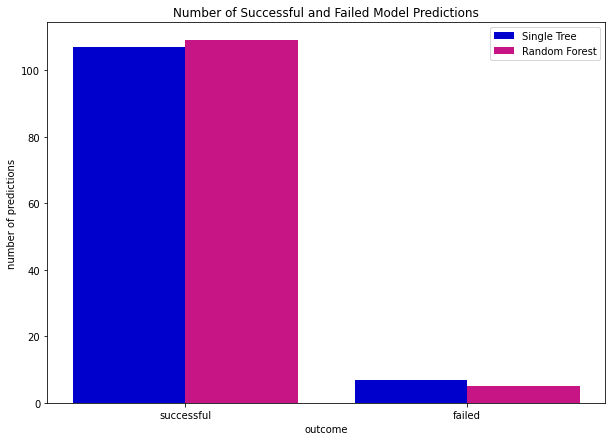

In [9]:
# I will look at row in the test set to see if the prediction for that particular cell was correct or not.
# This means looping over all cells in the test/validation set and comparing its true classification to the one
# made by each of the models. I'll need this information to construct the bar graph I was talking about above.

# Empty arrays:
tree_results_all = []
forest_results_all = []

# Loop over cells to see if the predicted classfication and actual classification match up:
# first for the single tree classification model:
for i in range(len(single_tree_all_predictions)):
    if single_tree_all_predictions[i] == targ_test_1.iloc[i]:
        tree_results_all.append('successful')
    else:
        tree_results_all.append('failed')

# then for the random forest classification model:
for i in range(len(forest_all_predictions)):
    if forest_all_predictions[i] == targ_test_1.iloc[i]:
        forest_results_all.append('successful')
    else:
        forest_results_all.append('failed')

# Count up the number of successes and the number of failures:
success_count_tree = tree_results_all.count('successful')
fails_count_tree = tree_results_all.count('failed')

success_count_forest = forest_results_all.count('successful')
fails_count_forest = forest_results_all.count('failed')

# Append the success counts and failure counts to arrays for plotting as a bar plot:
test_counts_tree =[success_count_tree, fails_count_tree]
test_counts_forest = [success_count_forest, fails_count_forest]

# Admittely, I probably could have gotten the above arrays much quicker by just plucking off
# the appropriate row/column from each confusion matrix, but sometimes it's nice to do it on
# your own just so you remember how it goes.

# The following code is taken from the Introduction to Matplotlib/Different Plot Types lesson on Codecademy.
# It will help me set up side-by-side bars for the successes/failures bar plot:

# Single tree classification model:
n = 1 # This is the first dataset (out of 2) 
t = 2 # Number of data sets 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
x_values1 = [t*element + w*n for element in range(d)]
# Random forest classification model:
n = 2 # This is the second dataset (out of 2) 
t = 2 # Number of data sets 
d = 2 # Number of bars 
w = 0.8 # Width of each bar 
x_values2 = [t*element + w*n for element in range(d)]

# Now to plot the actual bar plot:
plt.figure(figsize=(10,7))        
ax = plt.subplot()
plt.bar(x_values1, test_counts_tree, color = 'mediumblue')
plt.bar(x_values2, test_counts_forest, color = 'mediumvioletred')
ax.set_xticks([x_values1[0]+((x_values2[0]-x_values1[0])/2.0),\
               x_values1[1]+((x_values2[1]-x_values1[1])/2.0)])
ax.set_xticklabels(['successful','failed'])
plt.ylabel('number of predictions')
plt.xlabel('outcome')
plt.title('Number of Successful and Failed Model Predictions')
plt.legend(['Single Tree', 'Random Forest'])
plt.show()
plt.close('all')

While it's nice to have the confusion matrix for more detailed information, this gives a great visual overview of overall model performance. It's clear from the bar plot that the random forest model classified more cells successfully, and had fewer failed classifications; it's also clear that the single tree model's performance wasn't that much worse, as the heights of both sets of bars aren't vastly dissimilar. Thus, we see visually that the random forest classification model had the higher accuracy, but not by much.

But what if I want to look at the results for each cell in the test/validation set individually? There aren't that many -- only 114 -- so this isn't infeasible. I'm going to try something here that I did for my wine recognition classification project: namely, I'm going to plot, for each cell in the test/validation set, its true classification in grey, its single tree model predicted classification in red, and its random forest model predicted classification in blue. I'll use different symbols in an attempt to make each classification distinct in the plot below, as there will be 100+ overlaps of all three classifications. Fortunately, there are only two classification choices here: 0 for malignant and 1 for benign, so the vertical axis of the plot won't need to be very large. If I make the plot very wide, but very short, I should be able to see some detail in each data point. On the horizontal axis I will just plot the cell's "ID" in the test/validation set, which is just its index in the test array (i.e., an "ID" of 0 for the first cell, 1 for the second, and so on).

Text(0.5, 1.0, 'Actual Cell Classification Compared to Each Model Classification')

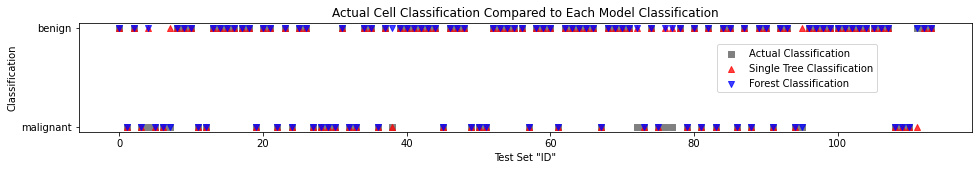

In [10]:
# Set up the horizontal axis with the cell "ID"s:
x_axis = range(len(targ_test_1))

# Plot each celll's classification as 1 or 0, for each cell ID, for each model as well as the true classification:
plt.figure(figsize=(16,2))
ax = plt.subplot()
plt.scatter(x_axis, targ_test_1, color = 'grey', marker = 's')
plt.scatter(x_axis, single_tree_all_predictions, color = 'red', marker = '^', alpha = 0.75)
plt.scatter(x_axis, forest_all_predictions, color = 'blue', marker = 'v', alpha = 0.75)
ax.set_yticks([0,1])
ax.set_yticklabels(['malignant','benign'])
plt.legend(['Actual Classification', 'Single Tree Classification', 'Forest Classification'], bbox_to_anchor=(0.9, 0.85))
plt.xlabel('Test Set "ID"')
plt.ylabel('Classification')
plt.title('Actual Cell Classification Compared to Each Model Classification')

Hmm. Well, it was worth a try I suppose, but the plot isn't quite as informative or as easy to understand as I'd hoped. It's easy to identify the cells for which a classification went wrong -- there's isolated triangles or squares for those data points -- but much harder to actually see what happened for each of those data points, i.e. which model(s) got the classification wrong. 

Maybe looking at all three implied comparisons as separate plots would help?

First let's compare the actual classifications of cells to the single tree model predicted classifications:

Text(0.5, 1.0, 'Actual Cell Classification Compared to Single Tree Classification')

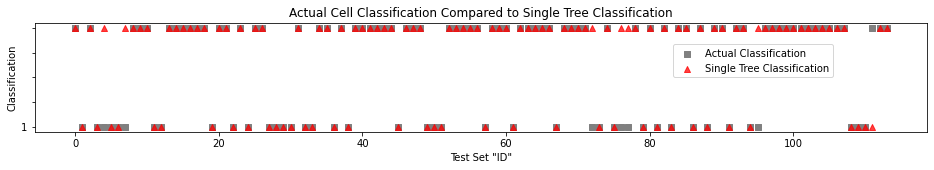

In [11]:
plt.figure(figsize=(16,2))
ax = plt.subplot()
plt.scatter(x_axis, targ_test_1, color = 'grey', marker = 's')
plt.scatter(x_axis, single_tree_all_predictions, color = 'red', marker = '^', alpha = 0.75)
ax.set_yticklabels([0,1])
plt.legend(['Actual Classification', 'Single Tree Classification'], bbox_to_anchor=(0.9, 0.85))
plt.xlabel('Test Set "ID"')
plt.ylabel('Classification')
plt.title('Actual Cell Classification Compared to Single Tree Classification')

Now it's easier to see where the true and single tree model classifications don't line up, and what specifically went wrong, but I've lost ability(ish) to see if the random forest model got it right or wrong.

So now I compare each cell's true classification with its random forest predicted classification:

Text(0.5, 1.0, 'Actual Cell Classification Compared to Random Forest Classification')

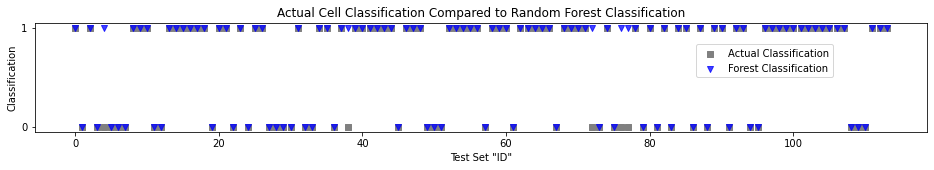

In [12]:
plt.figure(figsize=(16,2))
ax = plt.subplot()
plt.scatter(x_axis, targ_test_1, color = 'grey', marker = 's')
plt.scatter(x_axis, forest_all_predictions, color = 'blue', marker = 'v', alpha = 0.75)
ax.set_yticks([0,1])
ax.set_yticklabels([0,1])
plt.legend(['Actual Classification', 'Forest Classification'], bbox_to_anchor=(0.9, 0.85))
plt.xlabel('Test Set "ID"')
plt.ylabel('Classification')
plt.title('Actual Cell Classification Compared to Random Forest Classification')

Now it's easier to see where the true and random forest model classifications don't line up, and what specifically went wrong, but I cannot see if the single tree model got it right or wrong.

Lastly, I will compare, for each cell, its single tree model predicted classification to its random forest model predicted classification:

Text(0.5, 1.0, 'Single Tree Classification Compared to Random Forest Classification')

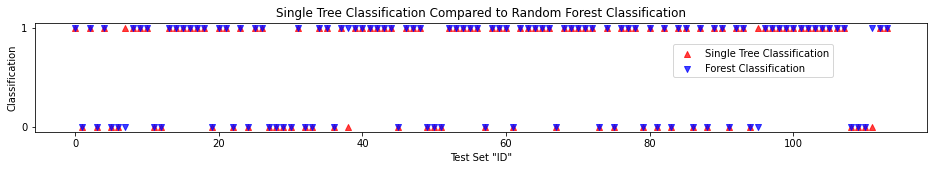

In [13]:
plt.figure(figsize=(16,2))
ax = plt.subplot()
plt.scatter(x_axis, single_tree_all_predictions, color = 'red', marker = '^', alpha = 0.75)
plt.scatter(x_axis, forest_all_predictions, color = 'blue', marker = 'v', alpha = 0.75)
ax.set_yticks([0,1])
ax.set_yticklabels([0,1])
plt.legend(['Single Tree Classification', 'Forest Classification'], bbox_to_anchor=(0.9, 0.85))
plt.xlabel('Test Set "ID"')
plt.ylabel('Classification')
plt.title('Single Tree Classification Compared to Random Forest Classification')

Now it is easy to see where the models didn't agree, but I can't tell what the true classification is.

All in all, these four visualizations were a nice idea in theory, but didn't work out in practice. If I revisit this project later (see below), I will see if I can improve upon these classification vs. test set "ID" plots.

<h1 style="text-align:center">  Building a Better(?) Model </h1>

Well, so far, neither my single decision tree classifier nor my random forest classifier has outperformed my logistic regression model of the Scikit-Learn breast cancer data in terms of accuracy. But, could I improve the accuracy of my tree and forest classifiers by carefully choosing a few features to leave out? I did that for the logistic regression model, and while I was unable to improve accuracy by doing so I was able to find a subset of features that yielded the same model accuracy (but with less input data). What if I do the same here? Could I get either/both of my single tree and/or random forest classifiers to perform at least as well as the logistic regression classifier? There's only one way to find out: try it!

The first logical place to start is to look at the set of features which allowed me to achieve a logistic regression model accuracy of 97.4% while neglecting features which didn't strongly affect the model fit. I have a list of those features from my logistic regression model Jupyter Notebook, so I'll copy them over here, run both a single decision tree classifier and a random forest classifier for this set of features, and see if there is a resulting improvement in model accuracy score.

In [14]:
# Here's what worked for the logistic regression model:

features_2 = all_features[['worst radius', 'worst area', 'worst perimeter', 'worst concave points', \
                          'mean concave points', 'worst texture', 'worst smoothness', 'worst concavity', \
                          'worst symmetry', 'mean concavity', 'mean compactness']]

# Splitting the data into training and test/validation sests:
feat_train_2, feat_test_2, targ_train_2, targ_test_2 = train_test_split(features_2, targets, train_size = 0.8, \
                                                                        test_size = 0.2, random_state = 1)


Building the next set of single tree and random forest classifiers (keeping the same random state as before, which matches the random state I used for the logistic regression classification project):

In [15]:
# single tree:
single_tree_2 = DecisionTreeClassifier(random_state = 1)
single_tree_2.fit(feat_train_2, targ_train_2)

# random forest:
forest_2 = RandomForestClassifier(n_estimators = 2000, random_state = 1)
forest_2.fit(feat_train_2, targ_train_2)

# make some predictions:
single_tree_2_predictions = single_tree_2.predict(feat_test_2)
forest_2_predictions=forest_2.predict(feat_test_2)

Now that the models have been trained and made their predictions, let's look at the resulting confusion matrices to get an indication of how they performed. We should also look at the overall model accuracy, too, as that's the criterion I'm using to judge the best model:

In [16]:
print('Single Decision Tree Confusion Matrix')
print(confusion_matrix(targ_test_2, single_tree_2_predictions))
print('Accuracy: ', single_tree_2.score(feat_test_2, targ_test_2))

Single Decision Tree Confusion Matrix
[[36  6]
 [ 0 72]]
Accuracy:  0.9473684210526315


We have improvement! The model still misclassifies 6 cells whose true classification is malignant, but it no longer misclassifies any benign cells. This has resulted in an increase in model accuracy from 93.9% to 94.7%. That's not much of an improvement, I readily admit, but still it is an improvement!

In [17]:
print('Random Forest Confusion Matrix')
print(confusion_matrix(targ_test_2, forest_2_predictions))
print('Accuracy: ', forest_2.score(feat_test_2, targ_test_2))

Random Forest Confusion Matrix
[[37  5]
 [ 0 72]]
Accuracy:  0.956140350877193


There is no change in confusion matrix or accuracy score for the random forest classifier. So while it didn't get any better, at least it didn't get any worse, and it was able to maintain its performance with fewer inputs.

I like data visualizations, so I will make one to visualize the single tree and random forest models' accuracies. I learned my lesson about trying to do a plot of each individual cell's classification, so why don't I stick to overall bar graphs of successes/failures for these models:

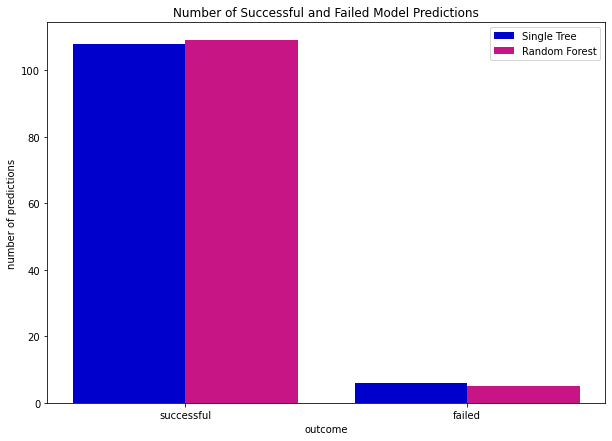

In [18]:
# Empty arrays:
tree_results_2 = []
forest_results_2 = []

# Loop over cells to see if the predicted classfication and actual classification match up:
# first for the single tree classification model:
for i in range(len(single_tree_2_predictions)):
    if single_tree_2_predictions[i] == targ_test_2.iloc[i]:
        tree_results_2.append('successful')
    else:
        tree_results_2.append('failed')

# then for the random forest classification model:
for i in range(len(forest_2_predictions)):
    if forest_2_predictions[i] == targ_test_2.iloc[i]:
        forest_results_2.append('successful')
    else:
        forest_results_2.append('failed')

# Count up the number of successes and the number of failures:
success_count_tree = tree_results_2.count('successful')
fails_count_tree = tree_results_2.count('failed')

success_count_forest = forest_results_2.count('successful')
fails_count_forest = forest_results_2.count('failed')

# Append the success counts and failure counts to arrays for plotting as a bar plot:
test_counts_tree =[success_count_tree, fails_count_tree]
test_counts_forest = [success_count_forest, fails_count_forest]

# Thanks Codecademy for the code below:
# Single tree classification model:
n = 1  
t = 2  
d = 2  
w = 0.8  
x_values1 = [t*element + w*n for element in range(d)]
# Random forest classification model:
n = 2  
t = 2  
d = 2 
w = 0.8  
x_values2 = [t*element + w*n for element in range(d)]

# Make the bar plot:
plt.figure(figsize=(10,7))        
ax = plt.subplot()
plt.bar(x_values1, test_counts_tree, color = 'mediumblue')
plt.bar(x_values2, test_counts_forest, color = 'mediumvioletred')
ax.set_xticks([x_values1[0]+((x_values2[0]-x_values1[0])/2.0),\
               x_values1[1]+((x_values2[1]-x_values1[1])/2.0)])
ax.set_xticklabels(['successful','failed'])
plt.ylabel('number of predictions')
plt.xlabel('outcome')
plt.title('Number of Successful and Failed Model Predictions')
plt.legend(['Single Tree', 'Random Forest'])
plt.show()
plt.close('all')

Unsurprisingly, this bar plot doesn't look all that different from the one I made for the single tree and random forest classifiers which used all features. However, there is a noticeable decrease in gap between the heights of the random forest and single tree "successful" and "failed" bars. Each set of bars is a bit closer in height now.

<h1 style="text-align:center">  Building an Even Better(?) Model </h1>

Above, we saw that carefully neglecting the same features which led to my same-performance-as-all-features-but-is-only-a-subset-of-them logistic regression model improved the performance of the single tree classification model of breast cancer data, and at least didn't result in a performance decrease for the random forest classification model. But could I, by carefully choosing more features to neglect, build models with even better performance? Or at the very least, could I build models with a minimum number of features which at least didn't result in a worse accuracy score?

I set about answering those questions. I had originally hypothesized that there would be a slightly different set of optimum features for the single tree and random forest classification models, but that turned out not to be the case. While I cannot pretend to have investigated every conceivable combination of input features, I was able to come up with a set that boosted the single tree classification model accuracy to match that of the random forest classification model, and simultaneously did not result in a decreased model accuracy for the random forest classification model. This seems to be the best I can do for the machine learning algorithms I am trying to implement for this particular splitting of training/test data for this particular data set.

Without further ado, here is that optimum set of features, which worked for both classification models (and which uses the same random state that I have been using throughout this project and the logistic regression project):

In [19]:
# The optimum set of features:
features_tree = all_features[['worst radius', 'worst area', 'worst concavity', 'worst concave points']]

# Splitting the data into training and test/validation sests:
feat_train_tree, feat_test_tree, targ_train_tree, targ_test_tree = \
   train_test_split(features_tree, targets, train_size = 0.8, test_size = 0.2, random_state = 1)

What I find so interesting about this set of optimum features is that "mean" measurements do not appear anywhere; no "mean" measurements appear to have a significant impact on the node splittings of the single tree classifier or the random tree classifier. Instead, what these classifiers seem to care about are the "worst" geometry measurements for the cell. No texture, no symmetry, no compactness; just how big is it, what is the radius, what are the concave points, and what is that concavity. I don't know anywhere near enough about the topic to say whether that indicates anything profound or not, it just struck me as interesting as I go about building toy machine learning models with this particular data set.

Well, at any rate, I need to actually build those machine learning models and show what their performance is like:

In [20]:
# Building the single tree classification model:
single_tree_3 = DecisionTreeClassifier(random_state = 1)
single_tree_3.fit(feat_train_tree, targ_train_tree)

# Building the random forest classification model:
forest_3 = RandomForestClassifier(n_estimators = 2000, random_state = 1)
forest_3.fit(feat_train_tree, targ_train_tree)

# And finally, make predictions:
single_tree_3_predictions = single_tree_3.predict(feat_test_tree)
forest_3_predictions=forest_3.predict(feat_test_tree)

Let's check in on the single decision tree's confusion matrix:

In [21]:
print('Single Decision Tree Confusion Matrix')
print(confusion_matrix(targ_test_tree, single_tree_3_predictions))
print('Accuracy: ', single_tree_3.score(feat_test_tree, targ_test_tree))
#0. 0.9473684210526315

Single Decision Tree Confusion Matrix
[[38  4]
 [ 1 71]]
Accuracy:  0.956140350877193


As I asserted above, one can clearly see that this set of input features has resulted in a single decision tree model with an accuracy score of 95.6%, which matches the accuracy score of the random forest classifier. The single tree classifier misclassified 4 malignant cells as benign, and one benign cell as malignant, but classified all other cells correctly.

Let's also check in on the random forest's confusion matrix:

In [22]:
print('Random Forest Confusion Matrix')
print(confusion_matrix(targ_test_tree, forest_3_predictions))
print('Accuracy: ', forest_3.score(feat_test_tree, targ_test_tree))

Random Forest Confusion Matrix
[[37  5]
 [ 0 72]]
Accuracy:  0.956140350877193


Again, there is no change in confusion matrix or accuracy score for the random forest classifier. So it seems that this particular set of features is the "bare minimum" that the random forest classifier needs to make the most accurate predictions it is capable of making.

Since I have already done two side-by-side bar graphs to visualize model accuracy performances, I will do another one here. It's obvious that it will yield bars with precisely the same sizes, but for the sake of completeness let's make the plot anyway:

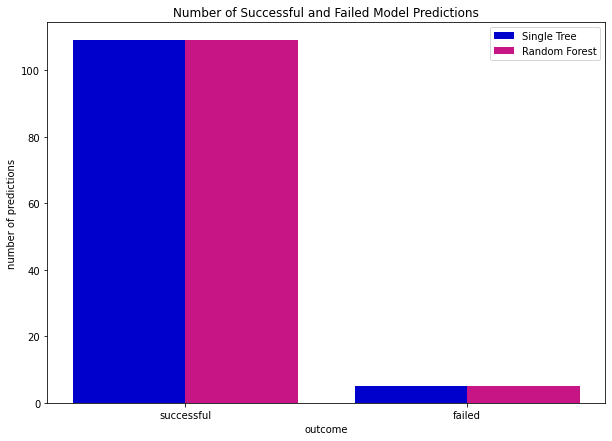

In [23]:
# Empty arrays:
tree_results_3 = []
forest_results_3 = []

# Loop over cells to see if the predicted classfication and actual classification match up:
# first for the single tree classification model:
for i in range(len(single_tree_3_predictions)):
    if single_tree_3_predictions[i] == targ_test_tree.iloc[i]:
        tree_results_3.append('successful')
    else:
        tree_results_3.append('failed')

# then for the random forest classification model:
for i in range(len(forest_3_predictions)):
    if forest_3_predictions[i] == targ_test_tree.iloc[i]:
        forest_results_3.append('successful')
    else:
        forest_results_3.append('failed')

# Count up the number of successes and the number of failures:
success_count_tree = tree_results_3.count('successful')
fails_count_tree = tree_results_3.count('failed')

success_count_forest = forest_results_3.count('successful')
fails_count_forest = forest_results_3.count('failed')

# Append the success counts and failure counts to arrays for plotting as a bar plot:
test_counts_tree =[success_count_tree, fails_count_tree]
test_counts_forest = [success_count_forest, fails_count_forest]

# Thanks Codecademy for the code below:
# Single tree classification model:
n = 1 # This is our first dataset (out of 2) 
t = 2 # Number of datasets 
d = 2 # Number of sets of bars 
w = 0.8 # Width of each bar 
x_values1 = [t*element + w*n for element in range(d)]
# Random forest classification model:
n = 2 # This is our second dataset (out of 2) 
t = 2 # Number of datasets 
d = 2 # Number of sets of bars 
w = 0.8 # Width of each bar 
x_values2 = [t*element + w*n for element in range(d)]

# Make the bar plot:
plt.figure(figsize=(10,7))        
ax = plt.subplot()
plt.bar(x_values1, test_counts_tree, color = 'mediumblue')
plt.bar(x_values2, test_counts_forest, color = 'mediumvioletred')
ax.set_xticks([x_values1[0]+((x_values2[0]-x_values1[0])/2.0),\
               x_values1[1]+((x_values2[1]-x_values1[1])/2.0)])
ax.set_xticklabels(['successful','failed'])
plt.ylabel('number of predictions')
plt.xlabel('outcome')
plt.title('Number of Successful and Failed Model Predictions')
plt.legend(['Single Tree', 'Random Forest'])
plt.show()
plt.close('all')

Sure enough, the bars are the same size; thus, I have built a single tree decision classifier whose accuracy score exactly matches that of my random tree classifier. However, neither model's accuracy is as high as my logistic regression model's accuracy. The logistic regression model does "need" a larger set of input features to make its highest accuracy predictions; the single tree and random forest models both max out their accuracy scores with a comparatively smaller set of features. However, since deciding with the highest accuracy possible what is benign and what is malignant is crucial to breast cancer detection and treatment, a logistic regression model seems to be the best choice of machine learning models I've tried so far for this particular data set. There is one caveat to that: Since the data set is small, and the test/validation set is even smaller, it's possible that shuffling a few cells between the training and test/validation sets could impact model performance and therefore my overall conclusions. That would be interesting to investigate in a future (very small) project.

<h1 style="text-align:center">  Conclusions  </h1>
<br>
I revisited the Scikit-Learn breast cancer data set and fit to that data a series of single decision tree classification and random forest classification models. The most accurate models I was able to construct had just four input features -- "worst radius", "worst area", "worst concavity", and "worst concave points" -- and achieved accuracy scores of 95.6%. This is a lower accuracy than the logistic regression model that I built for the same data set was able to achieve. Thus I conclude that, at least for this splitting of data between the training and test/validation sets, a logistic regression model is the best classification model to fit to the data if the goal is to achieve the highest accuracy possible.

<h1 style="text-align:center">  Limitations  </h1>
<br>
As I mentioned above, since the data set is so small the accuracy scores I reported would almost certainly be slightly different if a few cells were shuffled between the training and test/validation sets. Thus, for a slightly different set of training/test cells, one might be able to build a single tree classification model and/or random forest classification model of the data that is more accurate than a logistic regression model. It would be interesting to investigate this further, and at some point I may take that up as a very small project.<br>
And of course, as I mentioned in my logistic regression model write-up for this very same data set, the models I constructed in this project should in no way, shape, or form be construed as the best way to tell if a patient has breast cancer given measurements from a fine needle aspirate imaging method. These models were built for the purposes of practicing single tree and random forest classification and have no broader applications other than serving as practice exercises.